# Assignment 3
_Due: Midnight on Tuesday October 8, 2019_

### NetID: sh2432

In this assignment you will gain some experience with decision trees and random forests using two data sets. One is a diabetes data set, where the task is to predict the progression of the disease. The other a data set of real estate listings, where the task is to forecast the sale price of the house.

#### Submission Instructions:

Please fill out this _starter_ Jupyter Notebook, and submit __both__ this `.ipynb` file as well as a pdf file (via html).

 - In the notebook interface, choose `File -> Download as -> Notebook (ipynb)`.
 - In the notebook interface, choose `File -> Download as -> HTML`. Then open the html file, and print to pdf.

Notes:

 - We are using the markdown cell-type for texts (and latex), and the code cell-type for the python code. Make sure you don't mix these up. You can change the type from the dropdown at the toolbar on the top.
 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Regression trees vs. random forests (20 pts)

This problem is based on the `diabetes` dataset from the `sklearn` package. Please read about the dataset at [https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset). We will seek to predict the response, which is a quantitative measure of diabetes progression one year after baseline, using regression trees and random forests.

The following cell imports the dataset as `diabetes` and names the predictor variables `diabetes_x` and the response `diabetes_y`. The names of the six predictor variables are also printed. For a more detailed description, use the `.DESCR` aspect of `diabetes`.

In [176]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_x = diabetes.data
diabetes_y = diabetes.target
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [161]:
#diabetes.DESCR

### Part (a): Building a Simple Regression Tree

To start we will manually build a regression tree using only two of the predictor variables: `bmi` and `s5`. To keep things simple, build a tree that has exactly three nodes and four leaves. (i.e. the data is split into two parts initially and then each of those parts is again split one more time.) At each node you will need to evaluate each possible splitting point for both `bmi` and `s5` and pick the one that minimizes the RSS.

When you have built the regression tree, create a scatter plot of `s5` versus `bmi`, color-coded by the response variable. In this plot, use vertical and horizontal lines to indicate the regions that your tree splits the data into. You may find the functions `plt.hlines()` and `plt.vlines()` to be useful.

In [4]:
bmi = diabetes_x[:,2]
s5 = diabetes_x[:,8]
rss_bmi1 = []
rss_s51 = []

# we put a wrapper on the np.mean function to avoid warnings from taking the average of an empty list
def average(x):
    if len(x) == 0:
        return(0.0)
    else:
        return(np.mean(x))

# the following starter code finds the best splits for bmi and bp at the root
for i in range(len(bmi)):
    left1 = np.where(bmi <= bmi[i])[0]
    right1 = np.where(bmi > bmi[i])[0]
    rss_bmi1.append(np.sum((diabetes_y[left1] - average(diabetes_y[left1]))**2) + 
                   np.sum((diabetes_y[right1] - average(diabetes_y[right1]))**2))
    left1 = np.where(s5 <= s5[i])[0]
    right1 = np.where(s5 > s5[i])[0]
    rss_s51.append(np.sum((diabetes_y[left1] - average(diabetes_y[left1]))**2) + 
                  np.sum((diabetes_y[right1] - average(diabetes_y[right1]))**2))
#find the min RSS cut point for bmi and s5
best_bmi_cut1 = np.argmin(rss_bmi1)
best_s5_cut1 = np.argmin(rss_s51)

In [7]:
#model 1
rss_s52_left= []
rss_s52_right= []
#bmi as node1, separate bmi
left2 = np.where(bmi <= bmi[best_bmi_cut1])[0]
right2 = np.where(bmi > bmi[best_bmi_cut1])[0]
#s5 as node 2, find the min RSS and the cut point for the left side
for j in range(len(left2)):
    left3 = np.where(s5[left2] <= s5[left2][j])[0]
    right3 = np.where(s5[left2]  > s5[left2][j])[0]
    rss_s52_left.append(np.sum((diabetes_y[left3] - average(diabetes_y[left3]))**2) + 
                  np.sum((diabetes_y[right3] - average(diabetes_y[right3]))**2))

#s5 as node 2, find the min RSS and the cut point for the right side
for j in range(len(right2)):
    left3 = np.where(s5[right2] <= s5[right2][j])[0]
    right3 = np.where(s5[right2]  > s5[right2][j])[0]
    rss_s52_right.append(np.sum((diabetes_y[left3] - average(diabetes_y[left3]))**2) + 
                  np.sum((diabetes_y[right3] - average(diabetes_y[right3]))**2))

best_s5_cut2_left = np.argmin(rss_s52_left)
best_s5_cut2_right = np.argmin(rss_s52_right)

#calculate total RSS for the model
RSS1=min(rss_s52_left)+min(rss_s52_right)

In [10]:
RSS1

2565517.3304857835

In [11]:
#model 2
rss_bmi2_left = []
rss_bmi2_right = []
#s5 as node1, separate s5
left4 = np.where(s5 <= s5[best_s5_cut1])[0]
right4 = np.where(s5 > s5[best_s5_cut1])[0]
#bmi as node 2, find the min RSS and the cut point for the left
for m in range(len(left4)):
    left5 = np.where(bmi[left4] <= bmi[left4][m])[0]
    right5 = np.where(bmi[left4]  > bmi[left4][m])[0]
    rss_bmi2_left.append(np.sum((diabetes_y[left5] - average(diabetes_y[left5]))**2) + 
                  np.sum((diabetes_y[right5] - average(diabetes_y[right5]))**2))
#bmi as node 2, find the min RSS and the cut point for the right
for m in range(len(right4)):
    left5 = np.where(bmi[right4] <= bmi[right4][m])[0]
    right5 = np.where(bmi[right4]  > bmi[right4][m])[0]
    rss_bmi2_right.append(np.sum((diabetes_y[left5] - average(diabetes_y[left5]))**2) + 
                  np.sum((diabetes_y[right5] - average(diabetes_y[right5]))**2))

best_bmi5_cut2_left = np.argmin(rss_bmi2_left)
best_bmi5_cut2_right = np.argmin(rss_bmi2_right)

#calculate total RSS for the model
RSS2=min(rss_bmi2_left)+min(rss_bmi2_right)

#model 2 has a smaller total RSS, therefore, we should use s5 as node 1, bmi as node2

In [16]:
RSS2

2454029.6263736263

In [18]:
#generate 4 leaves
leaf1=(s5 <= s5[best_s5_cut1]) & (bmi <= bmi[left4][best_bmi5_cut2_left])
leaf2=(s5 <= s5[best_s5_cut1]) & (bmi > bmi[left4][best_bmi5_cut2_left])
leaf3=(s5 > s5[best_s5_cut1]) & (bmi <= bmi[right4][best_bmi5_cut2_right])
leaf4=(s5 > s5[best_s5_cut1]) & (bmi > bmi[right4][best_bmi5_cut2_right])

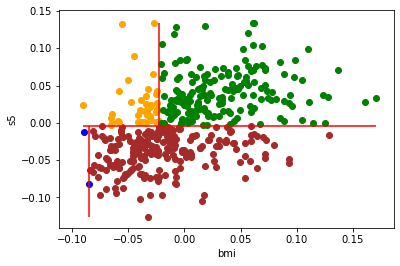

In [19]:
#scatter plot of bmi & s5
plt.scatter(bmi[leaf1], s5[leaf1],color='blue')
plt.scatter(bmi[leaf2], s5[leaf2],color='brown')
plt.scatter(bmi[leaf3], s5[leaf3],color='orange')
plt.scatter(bmi[leaf4], s5[leaf4],color='green')
plt.hlines(s5[best_s5_cut1],min(bmi),max(bmi),colors='r' )
plt.vlines(bmi[left4][best_bmi5_cut2_left], min(s5), s5[best_s5_cut1], colors='r')
plt.vlines(bmi[right4][best_bmi5_cut2_right], s5[best_s5_cut1], max(s5),colors='r')
plt.xlabel('bmi')
plt.ylabel('s5');

### Part (b) Fitting a Full Regression Tree

Now build a tree that uses all the predictor variables, has a more flexible structure, and is validated with a test set. Split the full dataset into a training set and a test set (50/50). Fit a regression tree to the training set using the function `DecisionTreeRegressor` from `sklearn.tree`. For now, use your best judgment to choose parameters for tree complexity; we will use analytical methods to choose parameters in later parts of this problem set. Some starter code is provided:

In [177]:
from sklearn import tree
#split data into 50/50
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(diabetes_x, diabetes_y, test_size=0.50, random_state=42)
regr = tree.DecisionTreeRegressor(max_depth=3).fit(xtrain, ytrain) 

### Part (c) Plotting the Tree

Plot your regression tree. To do so, we suggest that you use GraphViz in conjunction with `sklearn.tree.export_graphviz`. Once you install GraphViz, the following cell will plot the tree.

Instructions for using GraphViz (Windows):

1. Install GraphViz to your computer from the link [https://graphviz.gitlab.io/download/](https://graphviz.gitlab.io/download/).

2. Install the Python package using `pip install graphviz` or `conda install graphviz`.

3. Set a path to your computer's GraphViz installation (NOT the Python package). You can do so locally in this notebook by running something like `import os; os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'` (substituting in the location of your own GraphViz installation).

4. You can now use the functions in the `graphviz` package with `sklearn.tree.export_graphviz`!

Instructions for using GraphViz (Mac OS):

1. Make sure you have the package manager Homebrew.

2. Install GraphViz to your computer using `brew install graphviz`.

3. Install the Python package using `pip install graphviz` or `conda install graphviz`.

4. You can now use the functions in the `graphviz` package with `sklearn.tree.export_graphviz`! _Note: If you get an ExecutableNotFound error, you might have to set a path to your computer's GraphViz installation (NOT the Python package). You can do so locally in this notebook by running something like `import os; os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'` (substituting in the location of your own GraphViz installation)._


In [69]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [21]:
import graphviz
import os; os.environ["PATH"] += os.pathsep + 'C:/Users/kavan/Anaconda3/Lib/site-packages/graphviz/'
graphviz.Source(tree.export_graphviz(regr, out_file=None, feature_names=diabetes.feature_names))
#having trouble using graphviz.

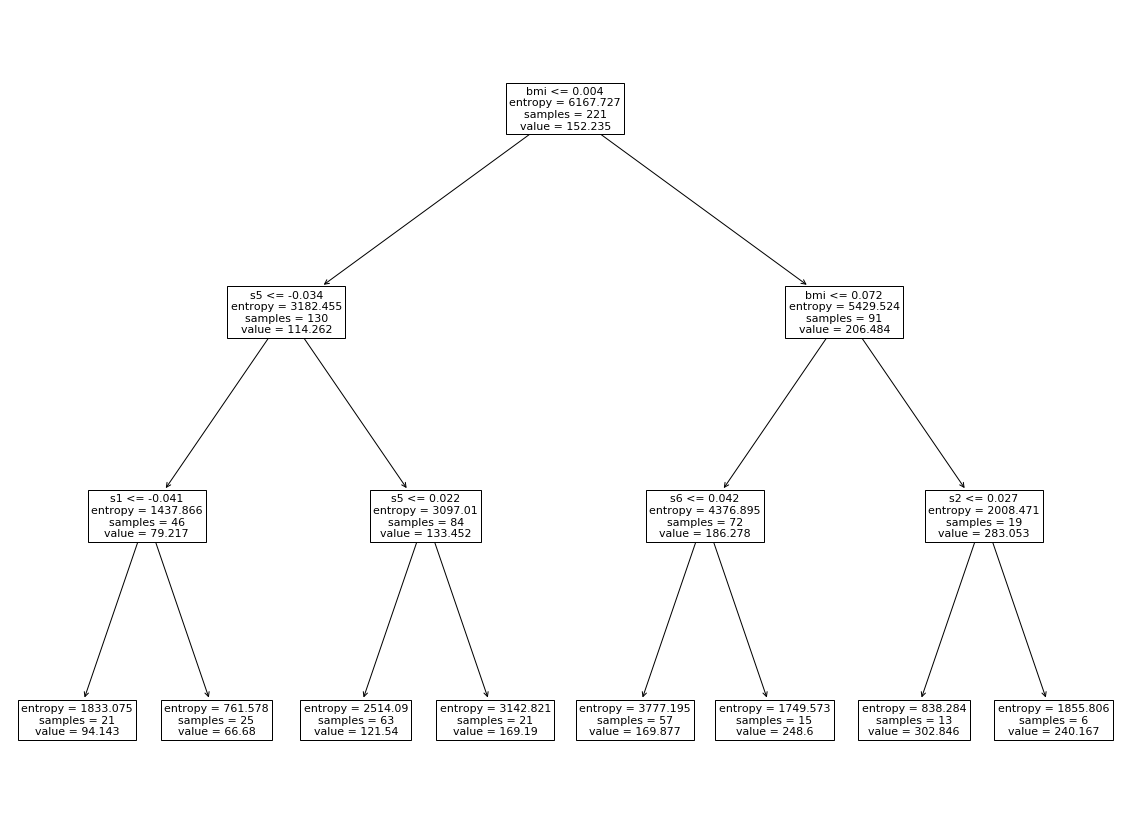

In [178]:
from sklearn import tree
plt.figure(figsize=(20,15))
_=tree.plot_tree(regr, feature_names = diabetes.feature_names, fontsize=11)

### Part (d) Evaluation

Interpret your regression tree. What are some examples of variables that seem to correspond with higher or lower measures of diabetes progression? Find the MSE of the model using the test set. The `.predict` method for your model can help with this.

In [90]:
y_predicted = regr.predict(xtest)
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f"% mean_squared_error(ytest, y_predicted))
#mse=np.sum((ytest-y_predicted)**2)/len(ytest)

Mean squared error: 3999.39


BMI, s5, s2, s6 and s1 are associated with diabetes progression. From the regression tree, we can interpret that one has BMI>0.072 and s2<=0.027 are at the highest risk of diabetes progression. On the other hand, people with BMI<=0.004, s5<=-0.034, and s1>-0.041 are at the lowest risk of diabetes progression.

### Part (e) Random Forest

Now use random forests to analyze the data with the `RandomForestRegressor` function from `sklearn.ensemble`. (Again, you may use your best judgment to choose the initial parameters for tree complexity.)

__(i)__ What test MSE do you obtain, and how does it compare to the test MSE of the regression tree above? 

__(ii)__ According to the model, which variables are most important in predicting diabetes progression? (The `.feature_importances_` method of the model may help with this.)

__(iii)__ Plot the MSE of the prediction against $m$, the number of variables considered at each split.

__(iv)__ Comment on the plot you created and if it makes sense.

In [179]:
from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")

np.random.seed(1000)
dtr = ensemble.RandomForestRegressor(min_samples_leaf = 15, max_features = 10)
regr = dtr.fit(xtrain, ytrain)
pred_y = regr.predict(xtest)
mse = sum(np.square(ytest-pred_y))/len(ytest)
print("Mean squared error: %.2f"% mean_squared_error(ytest, pred_y))

Mean squared error: 3295.84


i. the MSE of the model is 3295.84. It is smaller than the above regression tree model.

In [180]:
dtr.feature_importances_

array([0.01617747, 0.00740353, 0.55058908, 0.08585296, 0.01930502,
       0.        , 0.02745899, 0.00140377, 0.20423688, 0.08757232])

ii. bmi is the most important variable to predict diabetes progression.

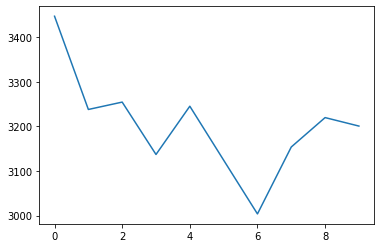

In [181]:
import warnings
warnings.filterwarnings("ignore")
list_mse=[]
np.random.seed(1000)
for m in range(1,11):    
    dtr = ensemble.RandomForestRegressor(min_samples_leaf = 15, max_features = m)
    regr = dtr.fit(xtrain, ytrain)
    pred_y = regr.predict(xtest)
    mse = sum(np.square(ytest-pred_y))/len(ytest)
    list_mse.append(mse)
plt.plot(list_mse);

iv. from the graph we can see that the mininum MSE is achieved when m=6.   

## Question 2: Analyzing Real Estate Data (40 pts)

In this problem, you will train random forests on data from the website Zillow to forecast the sale price of real estate listings. Random forests are nonparametric methods for classification and regression. As discussed in class, the method is based on the following idea: a good predictor will have low bias and low variance. A deep decision tree has low bias, but high variance. To reduce the variance, multiple trees are fit and averaged together. By introducing randomness in the construction of the trees, the correlation between them is reduced, to facilitate the variance reduction.

Read in the training and test sets as follows:

`import pandas as pd
train = pd.read_csv("zillow_train.csv")
test = pd.read_csv("zillow_test.csv")`

Use the following variables: `Lat`, `Long`, `ListPrice`, `SaleYear`, `Bathroom`, `Bedroom`, `BuildDecade`, `MajorRenov`, `FinishSqFt`, `LotSqFt`, `MSA`, `City`, `HighSchool`, `SalePrice`. You will build regression models to predict `SalePrice`.


### (a) Explore the data

Get an idea of what kind of data you're working with. As usual, you might ask yourself what $n$ (sample size) and $p$ (number of predictor variables) are here. Make plots of the distributions of the variables. Include a plot of the response, `SalePrice`. Does it appear that the data are "raw", or have they been pre-processed in different ways? If so, how?

In [64]:
import pandas as pd
train = pd.read_csv("zillow_training.csv")
test = pd.read_csv("zillow_testing.csv")

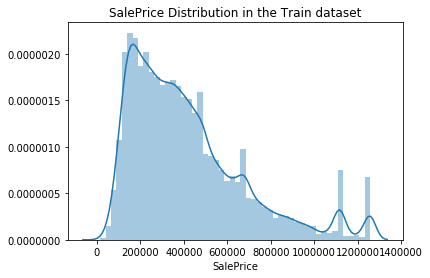

In [169]:
#for the consideration of assignment pages, here I only display the graphs of important ones. 
#I looked at the 13 listed predictors and the code is included though.
import seaborn as sns
plt.title("SalePrice Distribution in the Train dataset")
sns.distplot(train['SalePrice']);

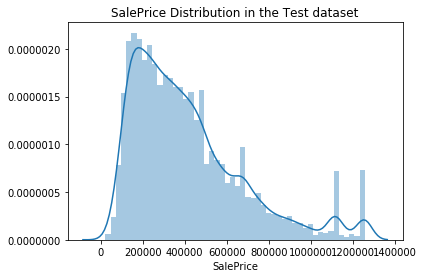

In [235]:
plt.title("SalePrice Distribution in the Test dataset")
sns.distplot(test['SalePrice']);

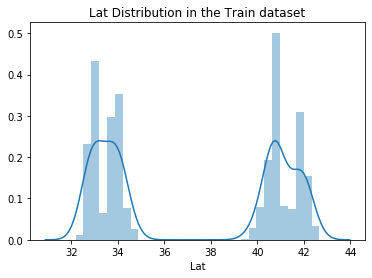

In [192]:
plt.title("Lat Distribution in the Train dataset")
sns.distplot(train['Lat']);

Text(0, 0.5, 'SalePrice')

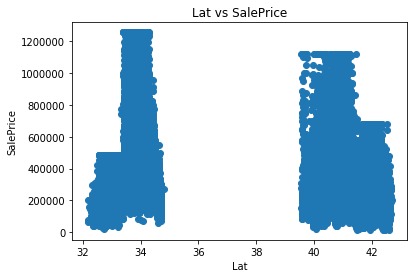

In [193]:
plt.title("Lat vs SalePrice")
plt.scatter(train['Lat'], train['SalePrice']);
plt.xlabel('Lat')
plt.ylabel('SalePrice')

In [208]:
# calculate covariance matrix
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train['Lat'], train['SalePrice'])
# calculate Pearson's correlation
corr, _ = pearsonr(train['Lat'], train['SalePrice'])
print(corr, _)

0.023342098642611067 7.590549009075087e-11


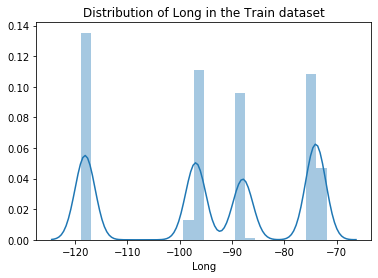

In [194]:
plt.title("Distribution of Long in the Train dataset")
sns.distplot(train['Long']);

Text(0, 0.5, 'SalePrice')

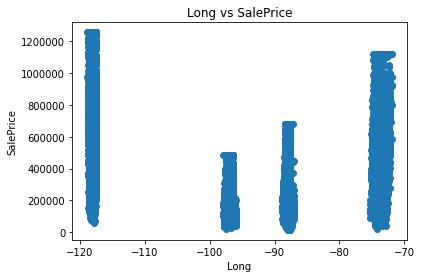

In [195]:
plt.title("Long vs SalePrice")
plt.scatter(train['Long'], train['SalePrice']);
plt.xlabel('Long')
plt.ylabel('SalePrice')

In [206]:
# calculate covariance matrix
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train['Long'], train['SalePrice'])
# calculate Pearson's correlation
corr, _ = pearsonr(train['Long'], train['SalePrice'])
print(corr, _)

-0.15947857346681357 0.0


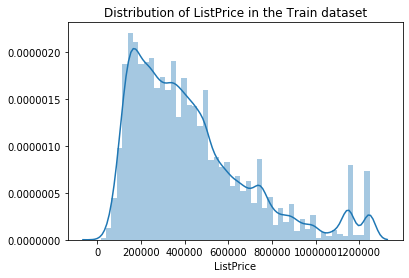

In [184]:
plt.title("Distribution of ListPrice in the Train dataset")
sns.distplot(train['ListPrice']);

Text(0, 0.5, 'SalePrice')

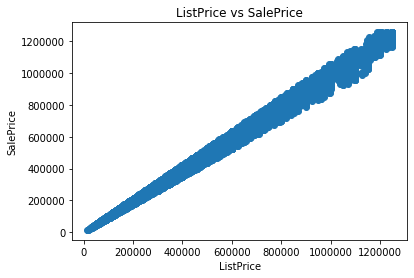

In [199]:
plt.title("ListPrice vs SalePrice")
plt.scatter(train['ListPrice'], train['SalePrice']);
plt.xlabel('ListPrice')
plt.ylabel('SalePrice')

In [207]:
# calculate covariance matrix
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train['ListPrice'], train['SalePrice'])
# calculate Pearson's correlation
corr, _ = pearsonr(train['ListPrice'], train['SalePrice'])
print(corr, _)

0.9982604705606637 0.0


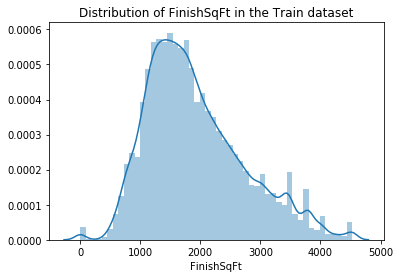

In [185]:
plt.title("Distribution of FinishSqFt in the Train dataset")
sns.distplot(train['FinishSqFt']);

Text(0, 0.5, 'SalePrice')

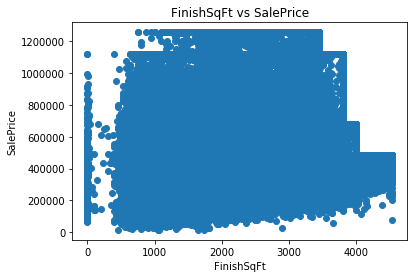

In [189]:
plt.title("FinishSqFt vs SalePrice")
plt.scatter(train['FinishSqFt'], train['SalePrice']);
plt.xlabel('FinishSqFt')
plt.ylabel('SalePrice')

In [209]:
# calculate covariance matrix
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train['FinishSqFt'], train['SalePrice'])
# calculate Pearson's correlation
corr, _ = pearsonr(train['FinishSqFt'], train['SalePrice'])
print(corr, _)

0.2741707662892455 0.0


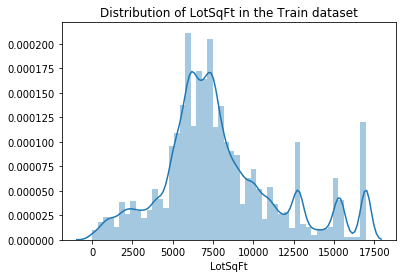

In [196]:
plt.title("Distribution of LotSqFt in the Train dataset")
sns.distplot(train['LotSqFt']);

Text(0, 0.5, 'SalePrice')

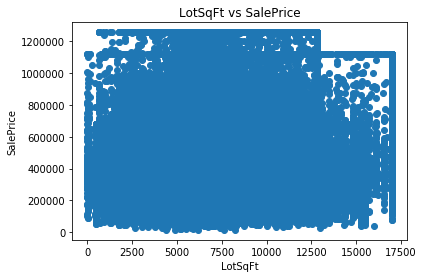

In [197]:
plt.title("LotSqFt vs SalePrice")
plt.scatter(train['LotSqFt'], train['SalePrice']);
plt.xlabel('LotSqFt')
plt.ylabel('SalePrice')

In [ ]:
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train['LotSqFt'], train['SalePrice'])
# calculate Pearson's correlation
corr, _ = pearsonr(train['LotSqFt'], train['SalePrice'])
print(corr, _)

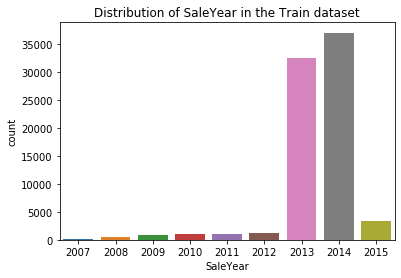

In [247]:
plt.title("Distribution of SaleYear in the Train dataset")
sns.countplot(train['SaleYear']);

Text(0, 0.5, 'SalePrice')

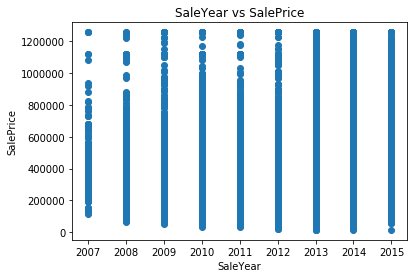

In [190]:
plt.title("SaleYear vs SalePrice")
plt.scatter(train['SaleYear'], train['SalePrice']);
plt.xlabel('SaleYear')
plt.ylabel('SalePrice')

In [220]:
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train['SaleYear'], train['SalePrice'])
# calculate Pearson's correlation
corr = pearsonr(train['SaleYear'], train['SalePrice'])
print(corr)

(0.07796925801179577, 4.4252012981066064e-105)


In [167]:
#plt.title("Distribution of Bathroom in the Train dataset")
#sns.countplot(train['Bathroom']);

In [168]:
#plt.title("Distribution of Bedroom in the Train dataset")
#sns.countplot(train['Bedroom']);

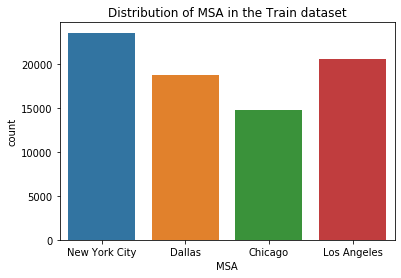

In [243]:
plt.title("Distribution of MSA in the Train dataset")
sns.countplot(train['MSA']);

Text(0, 0.5, 'SalePrice')

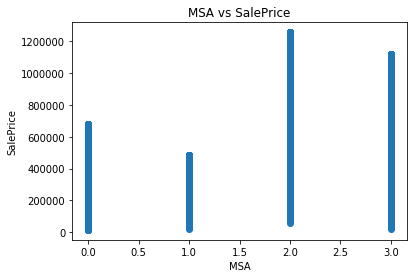

In [191]:
plt.title("MSA vs SalePrice")
plt.scatter(train['MSA'], train['SalePrice']);
plt.xlabel('MSA')
plt.ylabel('SalePrice')

In [212]:
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train['MSA'], train['SalePrice'])
# calculate Pearson's correlation
corr, _ = pearsonr(train['MSA'], train['SalePrice'])
print(corr, _)

0.37772582752035294 0.0


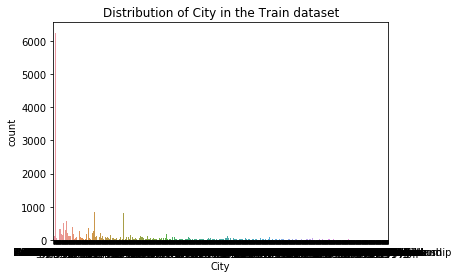

In [244]:
plt.title("Distribution of City in the Train dataset")
sns.countplot(train['City']);

In [165]:
#plt.title("Distribution of HighSchool in the Train dataset")
#sns.countplot(train['HighSchool']);

In [164]:
#plt.title("Distribution of BuildDecade in the Train dataset")
#sns.countplot(train['BuildDecade']);

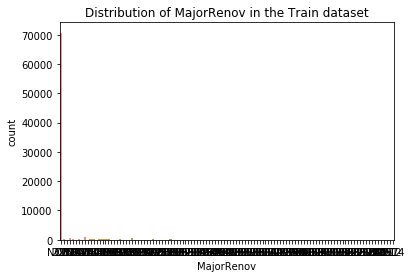

In [253]:
plt.title("Distribution of MajorRenov in the Train dataset")
sns.countplot(train['MajorRenov']);

There are n1=77728 rows of data in the train dataset, while n2=18682 rows of data in the test dataset. There are 24 variables in both datasets. As mentioned in the question discription, we want to use p=13 predictor variables (Lat, Long, ListPrice, SaleYear, Bathroom, Bedroom, BuildDecade, MajorRenov, FinishSqFt, LotSqFt, MSA, City, HighSchool) to predict SalePrice. I think the data are raw. The distribution of SalePrice in both test and train datasets are right skewed.

### Part (b) Preliminary steps

__(i)__ Some of the variables in the data are categorical; how many values do they take? (You may find the `.nunique` method of pandas to be useful here.) Why might factor variables with many categories present a problem when fitting decision trees? Describe a couple different ways of handling factor variables when fitting decision trees.


In [151]:
#data types of train datase
#train.dtypes

In [171]:
#number of values in each variable
train.nunique()

ID              77684
Lat             72960
Long            73090
ListDate        43347
ListPrice        4774
SaleDate         1955
TimetoSale      50277
SaleYear            9
ForSale             2
SalePrice        5052
Zest            69332
SaleList        21691
ZestList        73025
ZestSale        72525
Bathroom           10
Bedroom             8
BuiltYear         182
BuildDecade        29
MajorRenov        113
FinishSqFt       6222
LotSqFt         10374
MSA                 4
City             1289
HighSchool        654
City1               2
HighSchool1         2
BuildDecade1        2
MajorRenov1         2
dtype: int64

Among the 13 predictors, BuildDecade, MajorRenov, MSA, City, and HighSchool are categorical variables. These variables with many levels can lead to overfitting of the training data. Possible ways of handling categorical variables are: 
1. Treating factor variables with numeric values as continuous variables 
2. Regrouping levels of factor variables into fewer levels. 
3. Ignoring factor variables with many levels. 
4. Ordering the factor variables. 

__(ii)__ Use your best judgement to modify the Zillow dataset to handle factor variables. In addition to `pandas` and `numpy`, it might be helpful to look at functions in `sklearn.preprocessing`.

In [215]:
#would like to convert factors into binary
##find the element with the greatest values
train['City'].value_counts()
#new york shows the most count number
train['HighSchool'].value_counts()
#None values in Highschool

#convert city to binary
train['City1'] = np.where(train['City'].str.contains('New York'), 1, 0)
test['City1'] = np.where(test['City'].str.contains('New York'), 1, 0)
#convert Highschool to binary
train['HighSchool1'] = np.where(train['HighSchool'].str.contains('NONE'), 0, 1)
test['HighSchool1'] = np.where(test['HighSchool'].str.contains('NONE'), 0, 1)
#convert BuildDecade to binary
train['BuildDecade1'] = np.where(train['BuildDecade'].str.contains('UNKNOWN'), 0, 1)
test['BuildDecade1'] = np.where(test['BuildDecade'].str.contains('UNKNOWN'), 0, 1)
#convert MajorRenov to binary
train['MajorRenov1'] = np.where(train['MajorRenov'].str.contains('NONE'), 0, 1)
test['MajorRenov1'] = np.where(test['MajorRenov'].str.contains('NONE'), 0, 1)

In [216]:
#handle other factor variables
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()
#train data
train['MSA']=num.fit_transform(train['MSA'].astype('str')) #convert categorical variable to numeric
#test data
test['MSA']=num.fit_transform(test['MSA'].astype('str')) #convert categorical variable to numeric

In [218]:
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train['City1'], train['SalePrice'])
# calculate Pearson's correlation
corr, _ = pearsonr(train['City1'], train['SalePrice'])
print(corr, _)

0.22781395215121128 0.0


__(iii)__ We will soon use a few methods to predict `SalePrice`. Throughout, we will evaluate the predictions in terms of the absolute relative error:

<center>$\frac{1}{n}\sum_{i=1}^n \frac{\mid Y_i - \hat{Y}_i\mid}{Y_i}$</center>

Explain why this is a more appropriate choice of accuracy, compared with squared error.

The absolute relative error takes the scale of response variable into account while MSE does not. It gives a percentage deviation of the predicted value from the true value, which is more understandable and reasonable than the squared error.

### Part (c) Build models using random forests

Build random forest models to predict `SalePrice` from the other variables, using the appropriate method from `sklearn.ensemble`. As in Question 1, one parameter to vary is `max_features`, or the number of variables allowed in each split; this regulates the correlation between the trees in the random forest by introducing randomness. Two more relevant parameters are `n_estimators` and `min_samples_leaf`, or number of trees and minimum node size, which regulate variance and bias.

Train several random forest models, each time using different values of the parameters. Evaluate each model using 5-fold cross-validation (`sklearn.model_selection.KFold` may be a useful resource to perform k-fold cross-validation). For the sake of time, you may keep `n_estimators` low and constant. First vary `max_features` and create a plot of the cross-validation error versus the value of this parameter. Next vary `min_samples_leaf` and create a similar plot with the values of this parameter. 

Comment on how cross-validation error relates to `max_features` and `min_samples_leaf`, and how do you imagine it would relate to `n_estimators`? Does this make sense to you?

Now find a combination of values for `max_features` and `min_samples_leaf` that approximately minimizes the cross-validation error. 

_Note: Use mean absolute error (`mae`) rather than mean squared error (`mse`) as the criterion for growing the trees. But then when you evaluate different models, compute the relative absolute error, as described above._

In [72]:
#get train and test datasets
##decide not to use BuildDecade, MajorRenov, Long, and Lat. City,BuildDecade, MajorRenov and Highschool are converted to binary
#decide to use 5 predictors...takes too long to run the model
train_y=train["SalePrice"]
test_y=test["SalePrice"]
train_x=train[['ListPrice', 'SaleYear', 'MajorRenov1', 'FinishSqFt', 'City1']]
test_x=test[['ListPrice', 'SaleYear', 'MajorRenov1', 'FinishSqFt', 'City1']]

In [124]:
#get the best max_features
kf = model_selection.KFold(n_splits=5)
x=train_x
y=pd.DataFrame(train_y)

mae_list=[]
mse_list=[]
np.random.seed(1000)
for m in range(1, 6): # vary max_features

    dtr = ensemble.RandomForestRegressor(n_estimators = 5, min_samples_leaf = 21, #these are the parameters to vary
                                         max_features = m, criterion = 'mae')
    l_mae=[]
    l_mse=[]
    for train_index, test_index in kf.split(x):
        trainx = x.iloc[train_index,:]
        trainy = y.iloc[train_index,:]
        regr= dtr.fit(trainx, trainy.values.ravel())
        
        testx = x.iloc[test_index,:]
        testy = y.iloc[test_index,:]
        
        predy=regr.predict(testx)
        testy=testy.astype(float)
        
        predy=pd.DataFrame(predy)
        predy.index=testy.index
        predy.columns=['SalePrice']
        
        mae=np.sum(abs(predy-testy)/testy)/len(predy)
        mae=float(mae)
        l_mae.append(mae)
        
        mse=np.sum((testy-predy)**2)/len(testy)
        mse=float(mse)
        l_mse.append(mse)
        
    mae_mean=np.mean(l_mae)
    mse_mean=np.mean(l_mse)
    
    mae_list.append(mae_mean)
    mse_list.append(mse_mean)

In [125]:
mae_list

[0.0561970504856769,
 0.04010610761945603,
 0.027512300891980125,
 0.024698948539667497,
 0.024387906746150788]

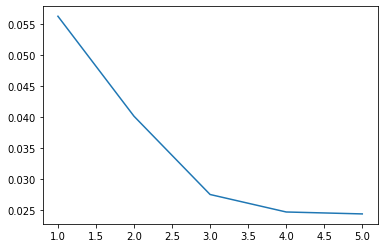

In [126]:
j=list(range(1, 6))
#MAE vs max_features
plt.plot(j, mae_list);
#minimun mae is achieved when max_features = 5

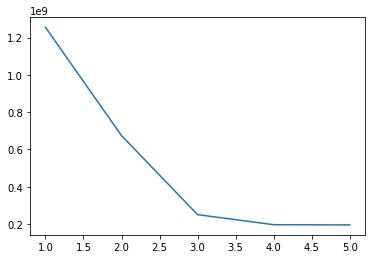

In [127]:
#MSE vs max_features
plt.plot(j, mse_list);

In [88]:
#find the best min_sample leaf when max_features=5
from sklearn import model_selection
from sklearn import ensemble
kf = model_selection.KFold(n_splits=5)
x=train_x
y=pd.DataFrame(train_y)

mae_list=[]
mse_list=[]
np.random.seed(1000)
for m in range(20, 31): # vary min_samples_leaf

    dtr = ensemble.RandomForestRegressor(n_estimators = 5, min_samples_leaf = m, #these are the parameters to vary
                                         max_features = 5, criterion = 'mae')
    l_mae=[]
    l_mse=[]
    for train_index, test_index in kf.split(x):
        trainx = x.iloc[train_index,:]
        trainy = y.iloc[train_index,:]
        regr= dtr.fit(trainx, trainy.values.ravel())
        
        testx = x.iloc[test_index,:]
        testy = y.iloc[test_index,:]
        
        predy=regr.predict(testx)
        testy=testy.astype(float)
        
        predy=pd.DataFrame(predy)
        predy.index=testy.index
        predy.columns=['SalePrice']
        
        mae=np.sum(abs(predy-testy)/testy)/len(predy)
        mae=float(mae)
        l_mae.append(mae)
        
        mse=np.sum((testy-predy)**2)/len(testy)
        mse=float(mae)
        l_mse.append(mse)
        
    mae_mean=np.mean(l_mae)
    mse_mean=np.mean(l_mse)
    
    mae_list.append(mae_mean)
    mse_list.append(mse_mean)

In [89]:
mae_list

[0.024398226566025506,
 0.024363708914315933,
 0.024379891405867306,
 0.024408190384826684,
 0.024366021683914375,
 0.02440363127183209,
 0.024405120585094493,
 0.02436951974600614,
 0.02440192745203835,
 0.024387336496003602,
 0.024412868926312566]

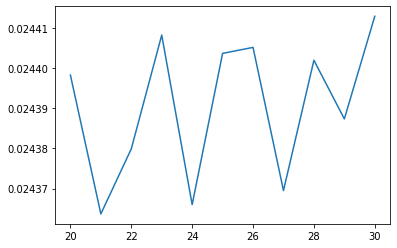

In [91]:
n=list(range(20, 31))
#MAE vs min_samples_leaf
plt.plot(n, mae_list);

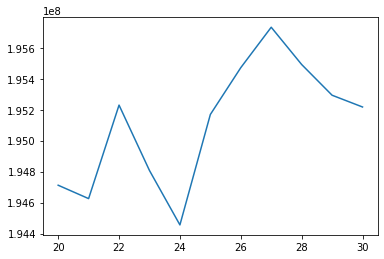

In [92]:
#MSE vs min_samples_leaf
plt.plot(n, mse_list);

In [128]:
#the best max_features is 5 when the min_samples_leaf is 21
kf = model_selection.KFold(n_splits=5)
x=train_x
y=pd.DataFrame(train_y)

mae_list=[]
mse_list=[]
np.random.seed(1000)
dtr = ensemble.RandomForestRegressor(n_estimators = 5, min_samples_leaf = 21,
                                         max_features = 5, criterion = 'mae')
l_mae=[]
l_mse=[]
for train_index, test_index in kf.split(x):
    trainx = x.iloc[train_index,:]
    trainy = y.iloc[train_index,:]
    regr= dtr.fit(trainx, trainy.values.ravel())
        
    testx = x.iloc[test_index,:]
    testy = y.iloc[test_index,:]
        
    predy=regr.predict(testx)
    testy=testy.astype(float)
        
    predy=pd.DataFrame(predy)
    predy.index=testy.index
    predy.columns=['SalePrice']
        
    mae=np.sum(abs(predy-testy)/testy)/len(predy)
    mae=float(mae)  
    mse=np.sum((testy-predy)**2)/len(testy)
    mse=float(mse) 

In [129]:
mae

0.024348506809824682

In [130]:
mse

197203178.94289342

When max_features is 5 and min_samples_leaf is 21, the model perferms best. As max_features increases, MAE decreases. It makes sense because though the correlation among trees becomes larger as it grows, the optimal split can be made with more choices of variables. As min_samples_leaf increases, MAE varies. It makes sense because it defines the minimal leaf size, not average, so a few nodes would be influenced.

### Part (d) Comparison to Least-Squares Regression

Now build a least-squares linear model for the response variable as a function of the predictor variables using the training set. You may wish to use the `sklearn.linear_model.LinearRegression` function, described
[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Experiment with different subsets of the predictor variables included in the linear model. 

Using the random forest model from Part (c) with the best combination of values for `max_features` and `min_samples_leaf` that you found, compare both the mean squared error and the relative absolute error on the test set from the random forest and linear models.

Which model does a better job at prediction? Do you think the model with the higher MSE has higher variance or higher bias, or both?

In [182]:
#linear regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf
#full model
r1 = smf.ols('SalePrice ~ Lat+Long+ListPrice+SaleYear+Bathroom+Bedroom+FinishSqFt+LotSqFt+BuildDecade1+MajorRenov1+MSA+City1+HighSchool1', data=train).fit()
r1.summary()
r1.pvalues
#p value of builddecade and highschool are >0.05, remove these predictors

Intercept        2.033504e-41
Lat             3.507861e-151
Long            2.356139e-236
ListPrice        0.000000e+00
SaleYear         8.378063e-42
Bathroom         1.460325e-03
Bedroom          1.920664e-07
FinishSqFt       3.740212e-36
LotSqFt          3.004936e-03
BuildDecade1     2.634588e-01
MajorRenov1      9.470013e-06
MSA              1.164534e-46
City1            9.372152e-09
HighSchool1      1.577987e-01
dtype: float64

In [159]:
#remove builddecade and highschool
r2 = smf.ols('SalePrice ~ Lat+Long+ListPrice+SaleYear+Bathroom+Bedroom+FinishSqFt+LotSqFt+MajorRenov1+MSA+City1', data=train).fit()
#r2.summary()

In [160]:
#now all predictors have significant p-values, but since in part c I used 5 predictors, to compare the models,
#I will only include the 5 predictors in the regression as well.
r3 = smf.ols('SalePrice ~ ListPrice+SaleYear+MajorRenov1+FinishSqFt+City1', data=train).fit()
r3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.621e+06
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:25:39   Log-Likelihood:            -8.5948e+05
No. Observations:               77728   AIC:                         1.719e+06
Df Residuals:                   77722   BIC:                         1.719e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.595e+06   1.07e+05    -14.971      0.000    -1.8e+06   -1.39e+06
ListPrice       0.9871      0.000   4379.358      0.000       0.987       0.988
SaleYear      793.3326     52.899     14.997      0.000     689.651     897.014
MajorRenov1   997.2314    192.523      5.180      0.000     619.886    1374.576
FinishSqFt     -3.0049      0.073    -41.010      0.000      -3.149      -2.861
City1       -8547.6689    216.222    -39.532      0.000   -8971.463   -8123.875
==============================================================================
Omnibus:                    12690.820   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70413.224
Skew:                          -0.676   Prob(JB):                         0.00
Kurtosis:                       7.463   Cond. No.                     9.71e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
pred_y = r3.predict(test_x)
mae=np.sum(abs(pred_y-test_y)/test_y)/len(test_y)
mse=np.sum((test_y-pred_y)**2)/len(test_y)

In [122]:
mse

235156322.5544734

In [79]:
mae

0.0271650206905516

The random forest model I built in problem 2c with max_features being 5 and min_samples_leaf being 21 has a better prediction than the linear regression model. The random forest model has a lower relative absolute error and a lower MSE. Since both bias and variance contribute to MSE, we try to reduce both of them, which leads to bias-variance trade-off. The model with the higher MSE might have a has higher variance or higher bias than the best model, but may not as well. For example, a model with a higher MSE can have a higher bias and a lower variance than the best model.

### Part (e) Predicting SalePrice

Read in the file "zillow_part_e.csv" which has 7000 houses with all the same variables as the training and testing set, except that the SalePrice variable is missing. 

Construct the best model you can on the training data. You can use random forests, or you may try to use gradient tree boosting, which is also available in sklearn.ensemble.  

Using your best model, predict the sale prices for these 7000 houses. Students will be assigned extra credit according to which decile they are in for the predictive accuracy (relative absolute error). (The top 10% will receive 10 points extra credit, the next 10% 9 points, and so on.) 

Save your predictions in a file called "zillow_predictions.csv" and submit this file with your homework. Your csv file should only contain a single column of predictions, without a header, where the $i$-th row corresponds to the predicted sale price for the $i$-th row of the dataset read in from "zillow_part_e.csv", excluding the header.


In [133]:
newdata = pd.read_csv("zillow_part_e.csv")
#handel the factor variables
#convert city to binary
newdata['City1'] = np.where(newdata['City'].str.contains('New York'), 1, 0)
#convert Highschool to binary
newdata['HighSchool1'] = np.where(newdata['HighSchool'].str.contains('NONE'), 0, 1)
#convert BuildDecade to binary
newdata['BuildDecade1'] = np.where(newdata['BuildDecade'].str.contains('UNKNOWN'), 0, 1)
#convert MajorRenov to binary
newdata['MajorRenov1'] = np.where(newdata['MajorRenov'].str.contains('NONE'), 0, 1)

test_x=newdata[['ListPrice', 'SaleYear', 'MajorRenov1', 'FinishSqFt', 'City1']]

#random forest
np.random.seed(1000)
dtr = ensemble.RandomForestRegressor(n_estimators = 5, min_samples_leaf = 21,
                                         max_features = 5, criterion = 'mae')
dtr.fit(train_x, train_y)  
pred_rf=dtr.predict(test_x)

In [148]:
pred_rf=pd.DataFrame(pred_rf)
pred_rf.columns=['random forest predicts']
pred_rf.head()

,random forest predicts
0,319000.0
1,260550.0
2,500200.0
3,198440.0
4,313980.0


In [146]:
pred_rf.shape

(7000, 1)

In [143]:
#gradient tree boosting model
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators = 5, min_samples_leaf = 21,
                                         max_features = 5, criterion = 'mae')
regressor.fit(train_x, train_y)
pred_gb=regressor.predict(test_x)

In [149]:
pred_gb=pd.DataFrame(pred_gb)
pred_gb.columns=['gradient boosting predicts']
pred_gb.head()

,gradient boosting predicts
0,378424.858562
1,351711.918562
2,451126.515753
3,323917.728562
4,371424.858562


In [150]:
pred_gb.shape

(7000, 1)

In [147]:
#decided to use the predictions from the random forest model
pred_rf.to_csv(r'C:/Users/kavan/Documents/My Study/SDS 555 Intro to Machine Learning/HW/HW 3/zillow_predictions.csv')